# Walk Forward: A Realistic Approach to Backtesting

## Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df = df.drop(columns='change_tomorrow_direction')

## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [3]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=15, random_state=42)
model_dt.fit(explanatory, target)

DecisionTreeRegressor(max_depth=15, random_state=42)

### Calculate the predictions

In [4]:
y_pred = model_dt.predict(X=explanatory)
y_pred

array([-0.08195771, -0.33014797, -0.08195771, ..., -0.31510252,
       -0.31510252, -3.8957311 ])

In [5]:
df_predictions = df[['change_tomorrow']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,-1.549143,-0.081958
2016-12-09,-0.321692,-0.330148
...,...,...
2023-03-14,-1.751806,-0.315103
2023-03-15,-3.895731,-3.895731


In [6]:
y_pred = model_dt.predict(X=explanatory)
y_pred

array([-0.08195771, -0.33014797, -0.08195771, ..., -0.31510252,
       -0.31510252, -3.8957311 ])

In [7]:
df_predictions['prediction_proba'] = y_pred
df_predictions

,change_tomorrow,prediction,prediction_proba
Date,,,
2016-12-08,-1.549143,-0.081958,-0.081958
2016-12-09,-0.321692,-0.330148,-0.330148
...,...,...,...
2023-03-14,-1.751806,-0.315103,-0.315103
2023-03-15,-3.895731,-3.895731,-3.895731


<Axes: >

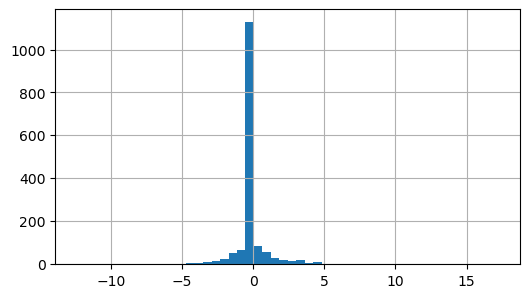

In [8]:
df_predictions.prediction_proba.hist(bins=50)

### Evaluate the model: compare predictions with the reality

In [9]:
model_dt.score(X=explanatory, y=target)

0.5431115880820776

## Walk Forward Validation

### How `TimeSeriesSplit` works

- Imagine we are in 2020, we can only train the data up until 31st December 2020, how good would have the model been going foward?

In [10]:
from sklearn.model_selection import TimeSeriesSplit

In [11]:
ts = TimeSeriesSplit(max_train_size=600, test_size=200)

In [12]:
list_df_train = []
list_df_test = []

for index_train, index_test in ts.split(df):
    list_df_train.append(df.iloc[index_train])
    list_df_test.append(df.iloc[index_test])

In [13]:
list_df_train[0]

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,-1.549143
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,-0.321692
...,...,...,...,...,...,...
2019-03-25,111.863188,113.254764,111.632861,112.918869,27067100,-0.212035
2019-03-26,113.840195,113.926565,112.141514,113.158806,26097700,0.976298


In [14]:
list_df_test[0]

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2019-03-27,113.129993,113.446697,110.865089,112.064720,22733400,-0.136831
2019-03-28,112.707721,112.842079,111.450503,112.218269,18334800,-0.856386
...,...,...,...,...,...,...
2020-01-08,154.122900,155.936349,153.172546,155.247818,27746500,-1.233897
2020-01-09,156.944909,157.313420,156.159411,157.187347,21385000,0.464873


In [15]:
list_df_train[1]

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2017-08-22,67.623224,68.455078,67.623224,68.380310,14343700,0.605051
2017-08-23,68.193381,68.370970,67.791474,67.969063,13766500,0.041291
...,...,...,...,...,...,...
2020-01-08,154.122900,155.936349,153.172546,155.247818,27746500,-1.233897
2020-01-09,156.944909,157.313420,156.159411,157.187347,21385000,0.464873


In [16]:
list_df_test[1]

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2020-01-10,157.895252,158.283148,156.304843,156.460007,20725900,-1.188150
2020-01-13,156.867310,158.370431,156.382433,158.341339,21626500,0.709280
...,...,...,...,...,...,...
2020-10-22,209.109629,211.191639,206.929880,210.048004,22351500,-0.619714
2020-10-23,210.184860,211.406695,208.357001,211.357819,18879600,2.927458


### Separate the data with X and y for training and testing

In [17]:
y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

In [18]:
list_df_train = []
list_df_test = []

for index_train, index_test in ts.split(df):
    X_train, y_train = X.iloc[index_train], y.iloc[index_train]
    X_test, y_test = X.iloc[index_test], y.iloc[index_test]


### Simulate one computation of the ML model

- Compute the model
- Calculate predictions on the test set
- Evaluate how good the model is

In [19]:
model_dt = DecisionTreeRegressor(max_depth=15, random_state=42)

In [20]:
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [21]:
y_pred = model_dt.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
error = mean_squared_error(y_test, y_pred)

### Add the procedure inside the for loop

In [25]:
model_dt = DecisionTreeRegressor(max_depth=15, random_state=42)

list_df_train = []
list_df_test = []

list_y_preds =  []
list_errors = []

for index_train, index_test in ts.split(df):
    X_train, y_train = X.iloc[index_train], y.iloc[index_train]
    X_test, y_test = X.iloc[index_test], y.iloc[index_test]
    
    model_dt.fit(X_train, y_train)
    y_pred = model_dt.predict(X_test)
    error = mean_squared_error(y_test, y_pred)

    list_y_preds.append(y_pred)
    list_errors.append(error)

In [26]:
list_errors

[9.37728476681153,
 11.93334281841984,
 33.695782586127095,
 4.759242524119641,
 4.713438223196523]

In [28]:
import  numpy as np

In [29]:
np.mean(list_errors)

12.895818183734926

In [30]:
from backtesting import Strategy

In [31]:
class Regression(Strategy):
    model = None

    limit_buy = 1
    limit_sell = -5

    N_TRAIN = 600

    def init(self):
        self.already_bought = False
        
        X_train = self.data.df.iloc[:self.N_TRAIN, :-1]
        y_train = self.data.df.iloc[:self.N_TRAIN, -1]

        self.model.fit(X_train, y_train)

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :-1]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [32]:
class WalkForward(Regression):
    def next(self):

        if len(self.data) < self.N_TRAIN:
            return # we don't take any action and move on to the following day
        
        if len(self.data) % 200 != 0:
            return super().next()
        
        X_train = self.data.df.iloc[-self.N_TRAIN:, :-1]
        y_train = self.data.df.iloc[-self.N_TRAIN:, -1]

        self.model.fit(X_train, y_train)

        super().next()

In [33]:
from backtesting import Backtest

In [34]:
bt = Backtest(df, WalkForward, cash=10000, commission=.002, exclusive_orders=True)

In [35]:
model_dt = DecisionTreeRegressor(max_depth=15, random_state=42)

In [36]:
result = bt.run(N_TRAIN = 600, model = model_dt, limit_buy = 1, limit_sell = -5)

In [37]:
result.to_frame(name='Value').loc[:'Return [%]'].style

,Value
Start,2016-12-08 00:00:00
End,2023-03-15 00:00:00
Duration,2288 days 00:00:00
Exposure Time [%],61.928934
Equity Final [$],20622.276216
Equity Peak [$],26870.822297
Return [%],106.222762


In [233]:
bt.plot(filename='a.html')

Row(id='3447', ...)

In [38]:
import multiprocessing as mp
mp.set_start_method('fork')

In [39]:
%%time

stats_skopt, heatmap, optimize_result = bt.optimize(
    N_TRAIN = range(300, 1000),
    model = [model_dt],
    limit_buy = range(0, 5), limit_sell = range(-5, 0),
    maximize='Return [%]',
    max_tries=500,
    random_state=0,
    return_heatmap=True,
    return_optimization=True,
    method='skopt'
    )

CPU times: user 28.4 s, sys: 98.2 ms, total: 28.5 s
Wall time: 28.7 s


In [40]:
dff = heatmap.reset_index()

In [41]:
dff.sort_values('Return [%]', ascending=False).head(10)

,N_TRAIN,model,limit_buy,limit_sell,Return [%]
16,324,"DecisionTreeRegressor(max_depth=15, random_sta...",4,-4,232.951342
15,323,"DecisionTreeRegressor(max_depth=15, random_sta...",4,-4,232.797776
13,322,"DecisionTreeRegressor(max_depth=15, random_sta...",4,-4,232.797776
20,329,"DecisionTreeRegressor(max_depth=15, random_sta...",1,-5,225.423667
9,315,"DecisionTreeRegressor(max_depth=15, random_sta...",4,-4,223.634951
11,320,"DecisionTreeRegressor(max_depth=15, random_sta...",4,-4,222.283006
3,303,"DecisionTreeRegressor(max_depth=15, random_sta...",4,-4,220.893393
1,300,"DecisionTreeRegressor(max_depth=15, random_sta...",4,-4,220.755709
23,335,"DecisionTreeRegressor(max_depth=15, random_sta...",0,-5,220.663415
4,304,"DecisionTreeRegressor(max_depth=15, random_sta...",3,-4,217.410508


In [239]:
result = bt.run(N_TRAIN=200, model=model_dt, limit_buy=0, limit_sell=-4)

In [185]:
bt.plot(filename='a.html')

Row(id='2427', ...)

In [240]:
result.to_frame(name='Value').loc[:'Return [%]'].style

,Value
Start,2016-12-08 00:00:00
End,2023-03-15 00:00:00
Duration,2288 days 00:00:00
Exposure Time [%],87.182741
Equity Final [$],41086.639496
Equity Peak [$],49179.374064
Return [%],310.866395
